Progetto BUSINESS INTELLIGENCE PER I SERVIZI FINANZIARI 
Appello 19/07/2024 

Riccardo Savio 885955

Stocks scelte:

- Info Tech
    - NVDA
    - QCOM

- Healthcare
    - UNH
    - JNJ

- Utilities 
    - NEE
    - SO


### Preparazione Ambiente

Installazione dei moduli richiesti:

pip install numpy
pip install pandas
pip install matplotlib
pip install yfinance


In [75]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
from scipy import stats

Scelgo l'intervallo di date per le azioni scelte

In [76]:
start = datetime.datetime(2014, 5, 31)
end = datetime.datetime(2024, 5, 31)

Utilizzando la funzione "download" della libreria yfinance, scarico i dati per ciascuna stock nell'intervallo di date scelte sopra

In [77]:
SP500 = pd.DataFrame(yf.download('^GSPC', start=start, end=end))
NVDA = pd.DataFrame(yf.download('NVDA', start=start, end=end))
QCOM = pd.DataFrame(yf.download('QCOM', start=start, end=end))
UNH = pd.DataFrame(yf.download('UNH', start=start, end=end))
LLY = pd.DataFrame(yf.download('LLY', start=start, end=end))
NEE = pd.DataFrame(yf.download('NEE', start=start, end=end))
SO = pd.DataFrame(yf.download('SO', start=start, end=end))

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Salvo tutti i dataframe in file csv per renderli persistenti

In [78]:
SP500.to_csv('data/SP500.csv')
NVDA.to_csv('data/NVDA.csv')
QCOM.to_csv('data/QCOM.csv')
UNH.to_csv('data/UNH.csv')
LLY.to_csv('data/LLY.csv')
NEE.to_csv('data/EE.csv')
SO.to_csv('data/SO.csv')

Visualizzo la struttura dei dataframe

In [79]:
print(SP500.columns)
print(NVDA.columns)
print(QCOM.columns)
print(UNH.columns)
print(LLY.columns)
print(NEE.columns)
print(SO.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Rimuovo tutti i valori nulli dei dataframe

In [80]:
SP500.dropna(inplace=True)
NVDA.dropna(inplace=True)
QCOM.dropna(inplace=True)
UNH.dropna(inplace=True)
LLY.dropna(inplace=True)
NEE.dropna(inplace=True)
SO.dropna(inplace=True)

In [81]:
stocks = [NVDA, QCOM, UNH, LLY, NEE, SO]

Visualizzo i dati delle chiusure aggiustate giornaliere

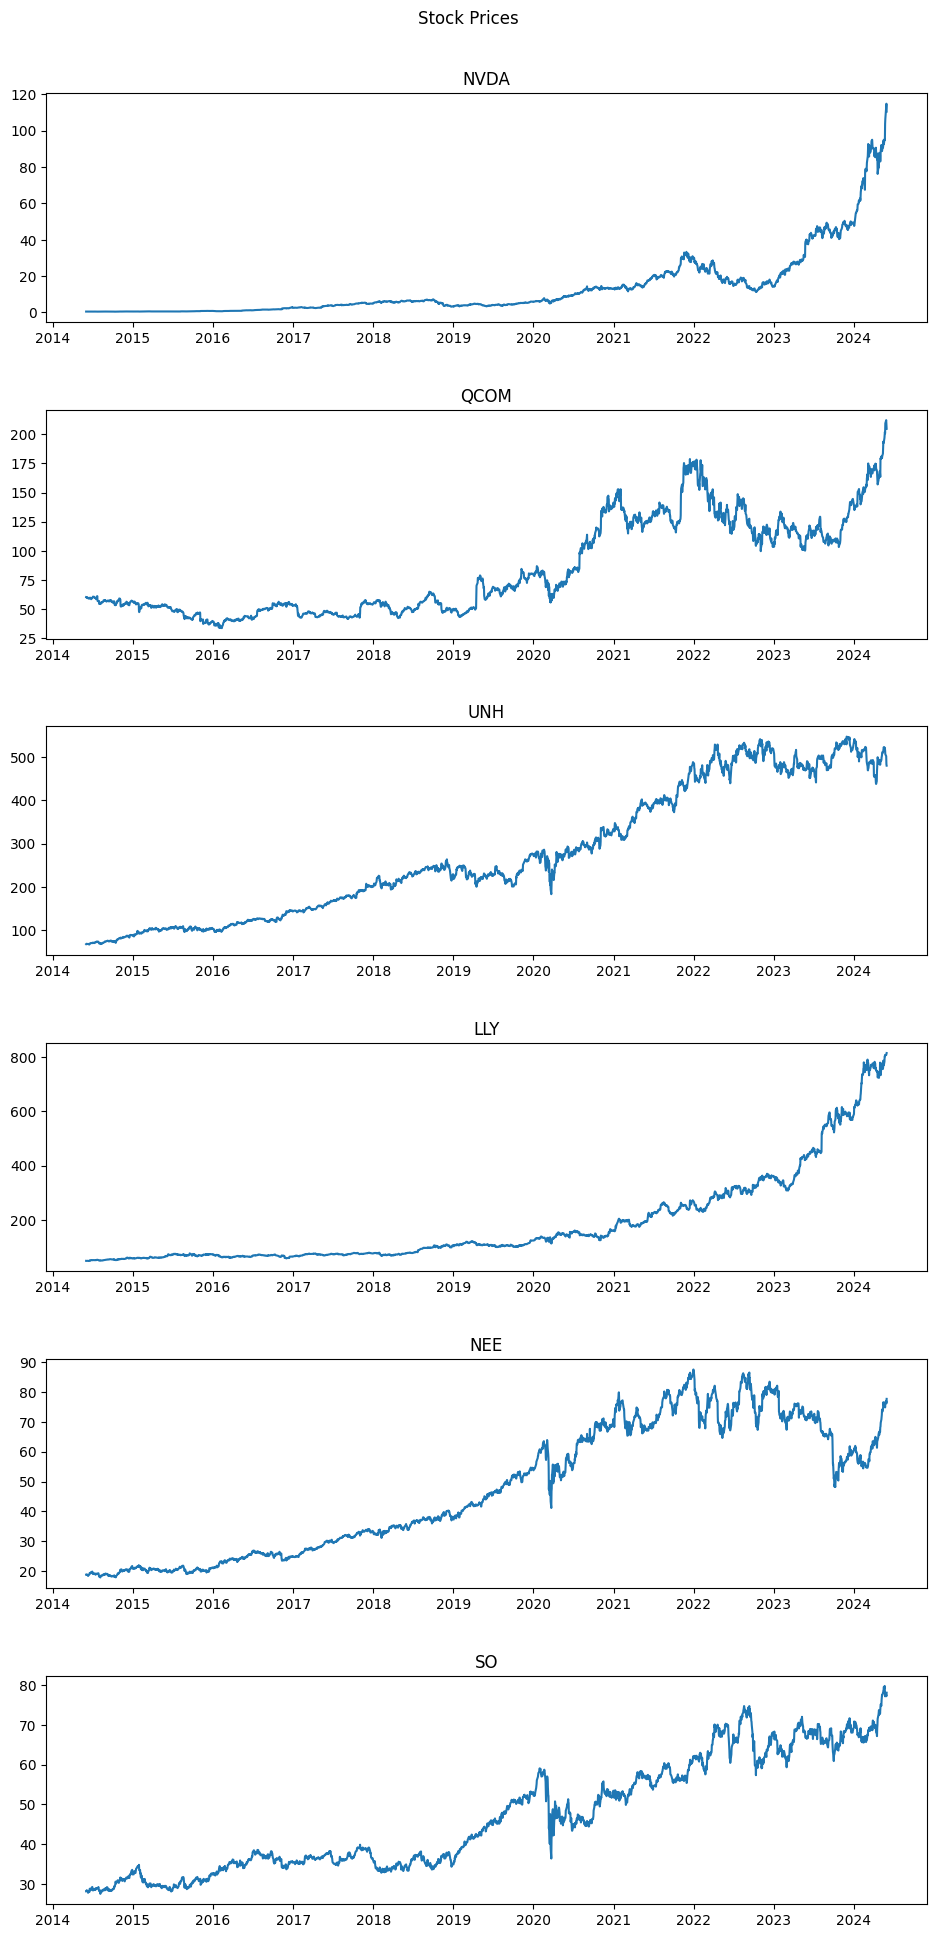

In [82]:
#create 6 subplots
fig, axs = plt.subplots(6, 1, figsize=(10, 20))
fig.suptitle('Stock Prices')

axs[0].plot(NVDA['Adj Close'])
axs[0].set_title('NVDA')

axs[1].plot(QCOM['Adj Close'])
axs[1].set_title('QCOM')

axs[2].plot(UNH['Adj Close'])
axs[2].set_title('UNH')

axs[3].plot(LLY['Adj Close'])
axs[3].set_title('LLY')

axs[4].plot(NEE['Adj Close'])
axs[4].set_title('NEE')

axs[5].plot(SO['Adj Close'])
axs[5].set_title('SO')

plt.tight_layout(pad=3.0)
plt.show()

Calcolo rendimenti semplici lordi, netti e logaritmici 

In [83]:
NVDA['Net Return'] = NVDA['Adj Close'].pct_change()
QCOM['Net Return'] = QCOM['Adj Close'].pct_change()
UNH['Net Return'] = UNH['Adj Close'].pct_change()
LLY['Net Return'] = LLY['Adj Close'].pct_change()
NEE['Net Return'] = NEE['Adj Close'].pct_change()
SO['Net Return'] = SO['Adj Close'].pct_change()

NVDA['Gross Return'] = NVDA['Adj Close']/NVDA['Adj Close'].shift(1)
QCOM['Gross Return'] = QCOM['Adj Close']/QCOM['Adj Close'].shift(1)
UNH['Gross Return'] = UNH['Adj Close']/UNH['Adj Close'].shift(1)
LLY['Gross Return'] = LLY['Adj Close']/LLY['Adj Close'].shift(1)
NEE['Gross Return'] = NEE['Adj Close']/NEE['Adj Close'].shift(1)
SO['Gross Return'] = SO['Adj Close']/SO['Adj Close'].shift(1)

NVDA['Log Return'] = np.log(NVDA['Gross Return'])
QCOM['Log Return'] = np.log(QCOM['Gross Return'])
UNH['Log Return'] = np.log(UNH['Gross Return'])
LLY['Log Return'] = np.log(LLY['Gross Return'])
NEE['Log Return'] = np.log(NEE['Gross Return'])
SO['Log Return'] = np.log(SO['Gross Return'])

NVDA.dropna(inplace=True)
QCOM.dropna(inplace=True)
UNH.dropna(inplace=True)
LLY.dropna(inplace=True)
NEE.dropna(inplace=True)
SO.dropna(inplace=True)

Visualizzo i rendimenti netti, lordi e logaritmici per le singole stock

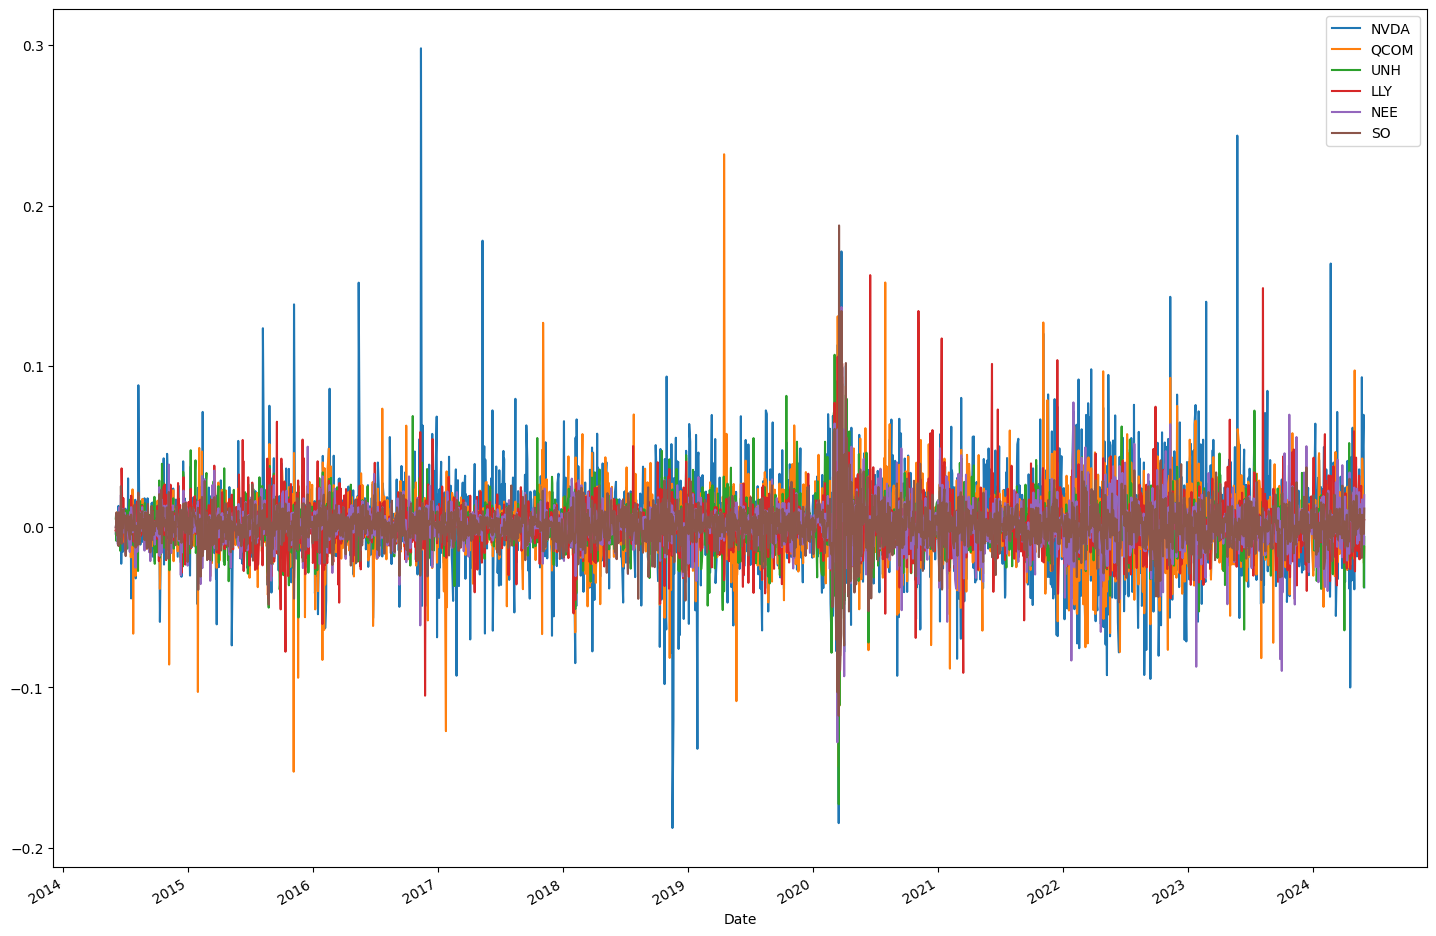

In [84]:
stocks = [NVDA, QCOM, UNH, LLY, NEE, SO]
stocks_tickets = ['NVDA', 'QCOM', 'UNH', 'LLY', 'NEE', 'SO']

df = pd.DataFrame(columns=stocks_tickets)

#add net return column of each stock in df
for stock, stock_ticket in zip(stocks, stocks_tickets):
    df[stock_ticket] = stock['Net Return']

df.plot(figsize=(15,10))   
plt.tight_layout(pad=3.0)
plt.show()

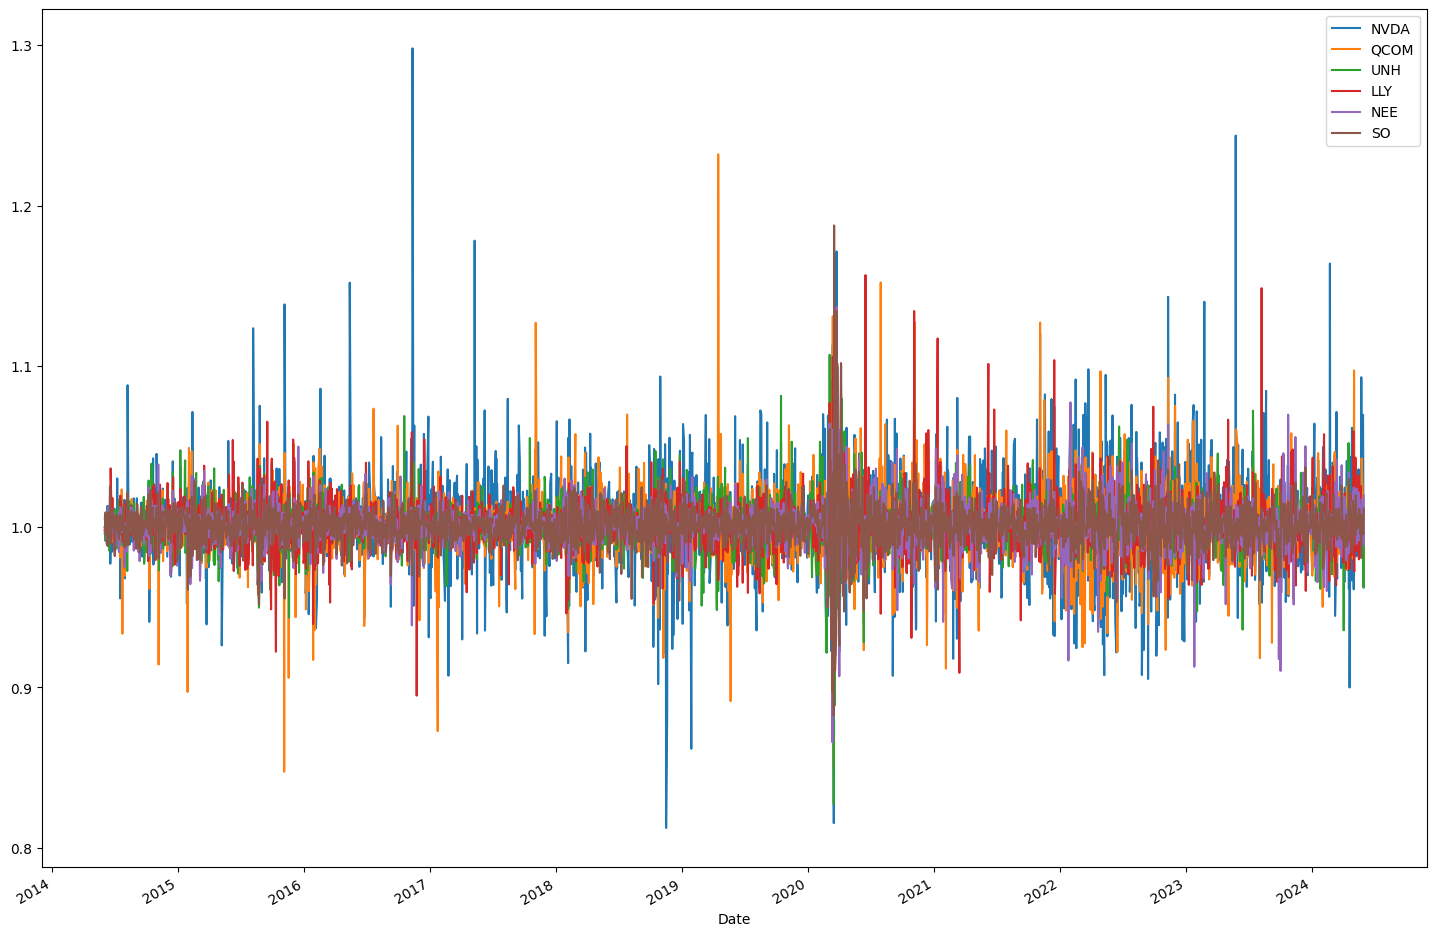

In [85]:
df = pd.DataFrame(columns=stocks_tickets)

#add net return column of each stock in df
for stock, stock_ticket in zip(stocks, stocks_tickets):
    df[stock_ticket] = stock['Gross Return']

df.plot(figsize=(15,10))   
plt.tight_layout(pad=3.0)
plt.show()

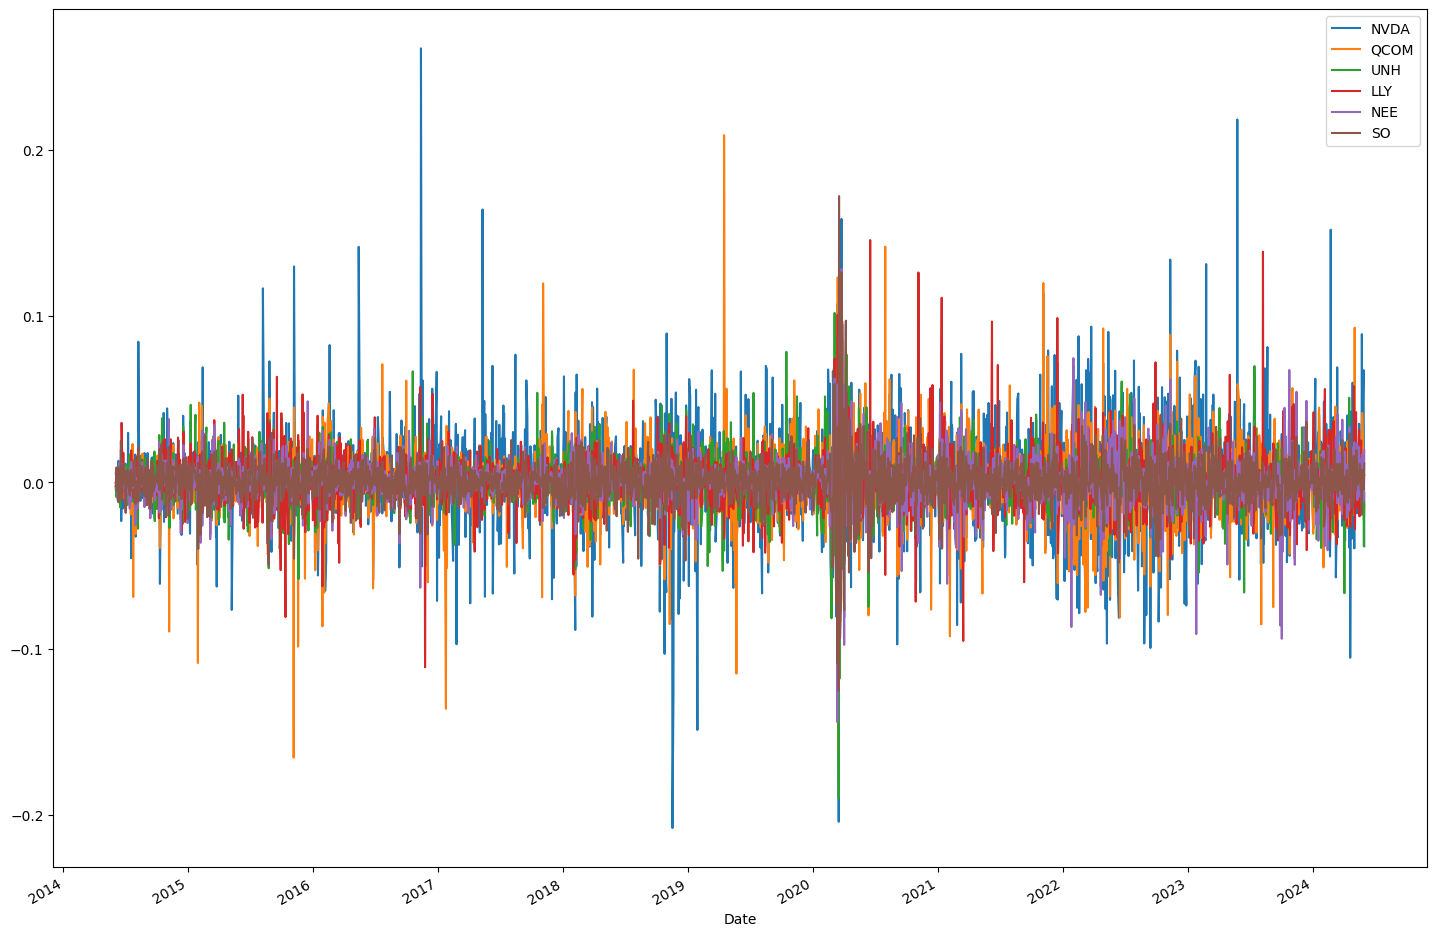

In [86]:
df = pd.DataFrame(columns=stocks_tickets)

#add net return column of each stock in df
for stock, stock_ticket in zip(stocks, stocks_tickets):
    df[stock_ticket] = stock['Log Return']

df.plot(figsize=(15,10))   
plt.tight_layout(pad=3.0)
plt.show()

          NVDA      QCOM
NVDA  1.000000  0.540297
QCOM  0.540297  1.000000


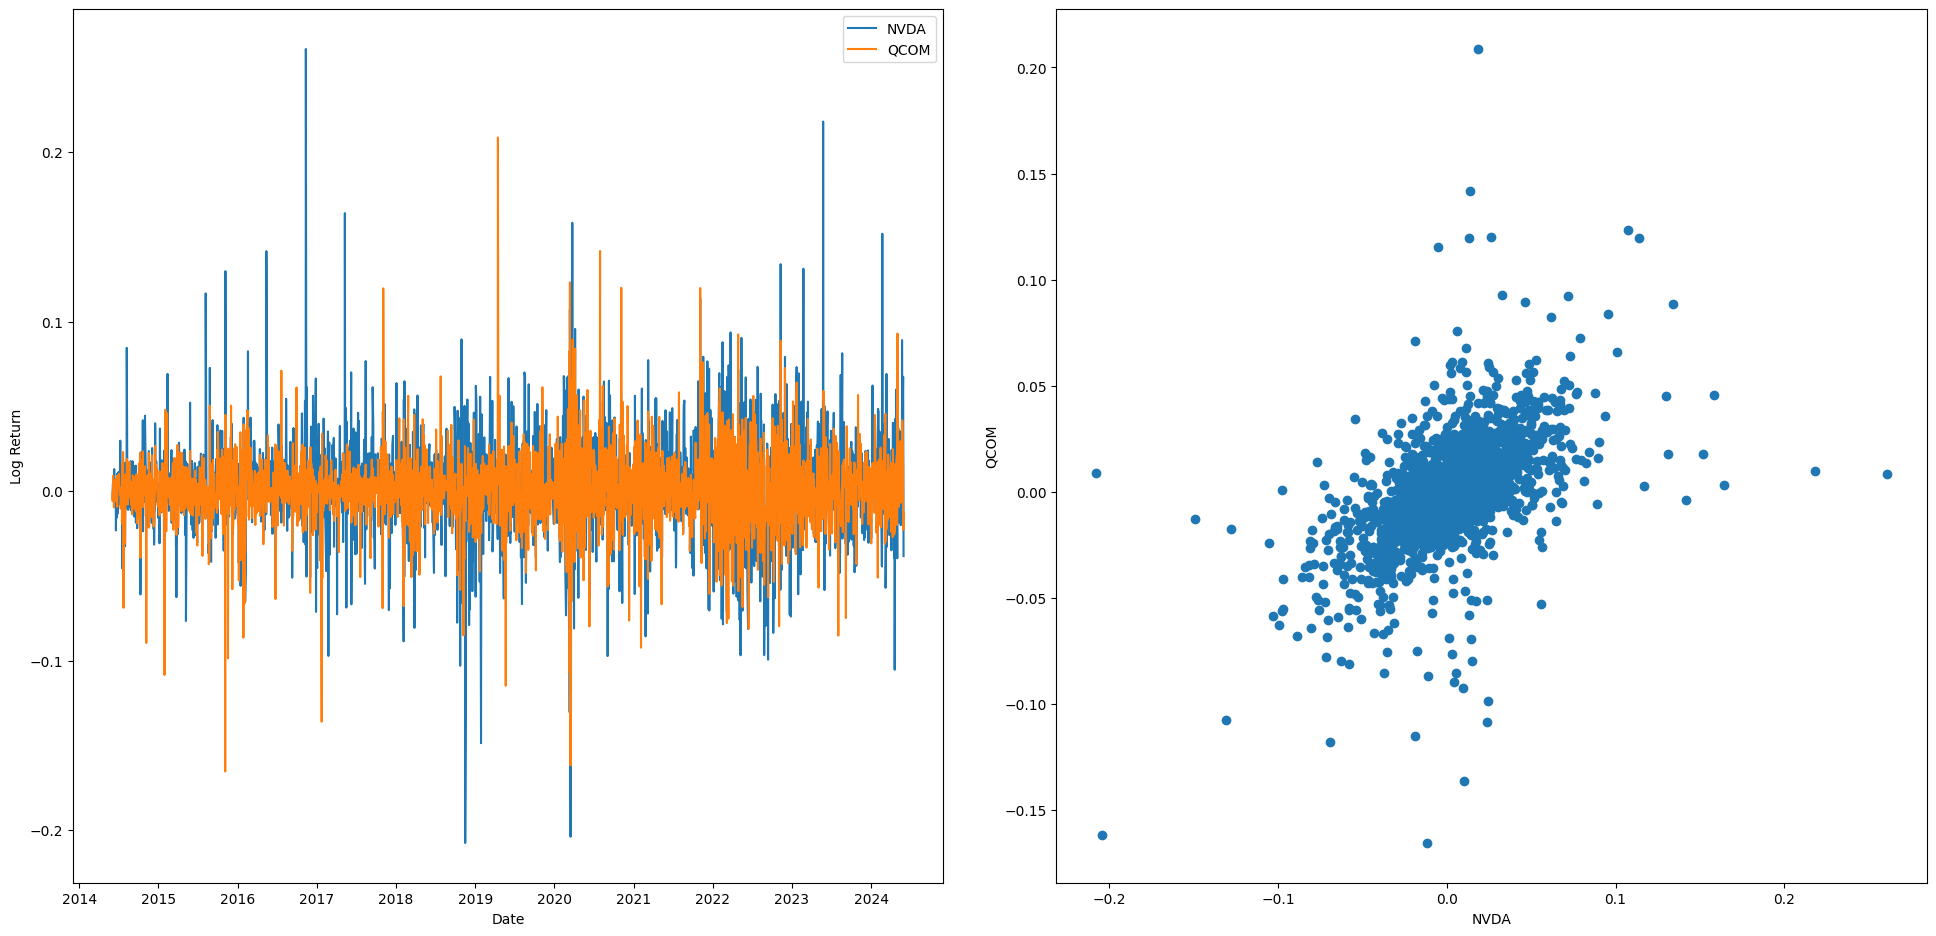

          UNH       LLY
UNH  1.000000  0.402896
LLY  0.402896  1.000000


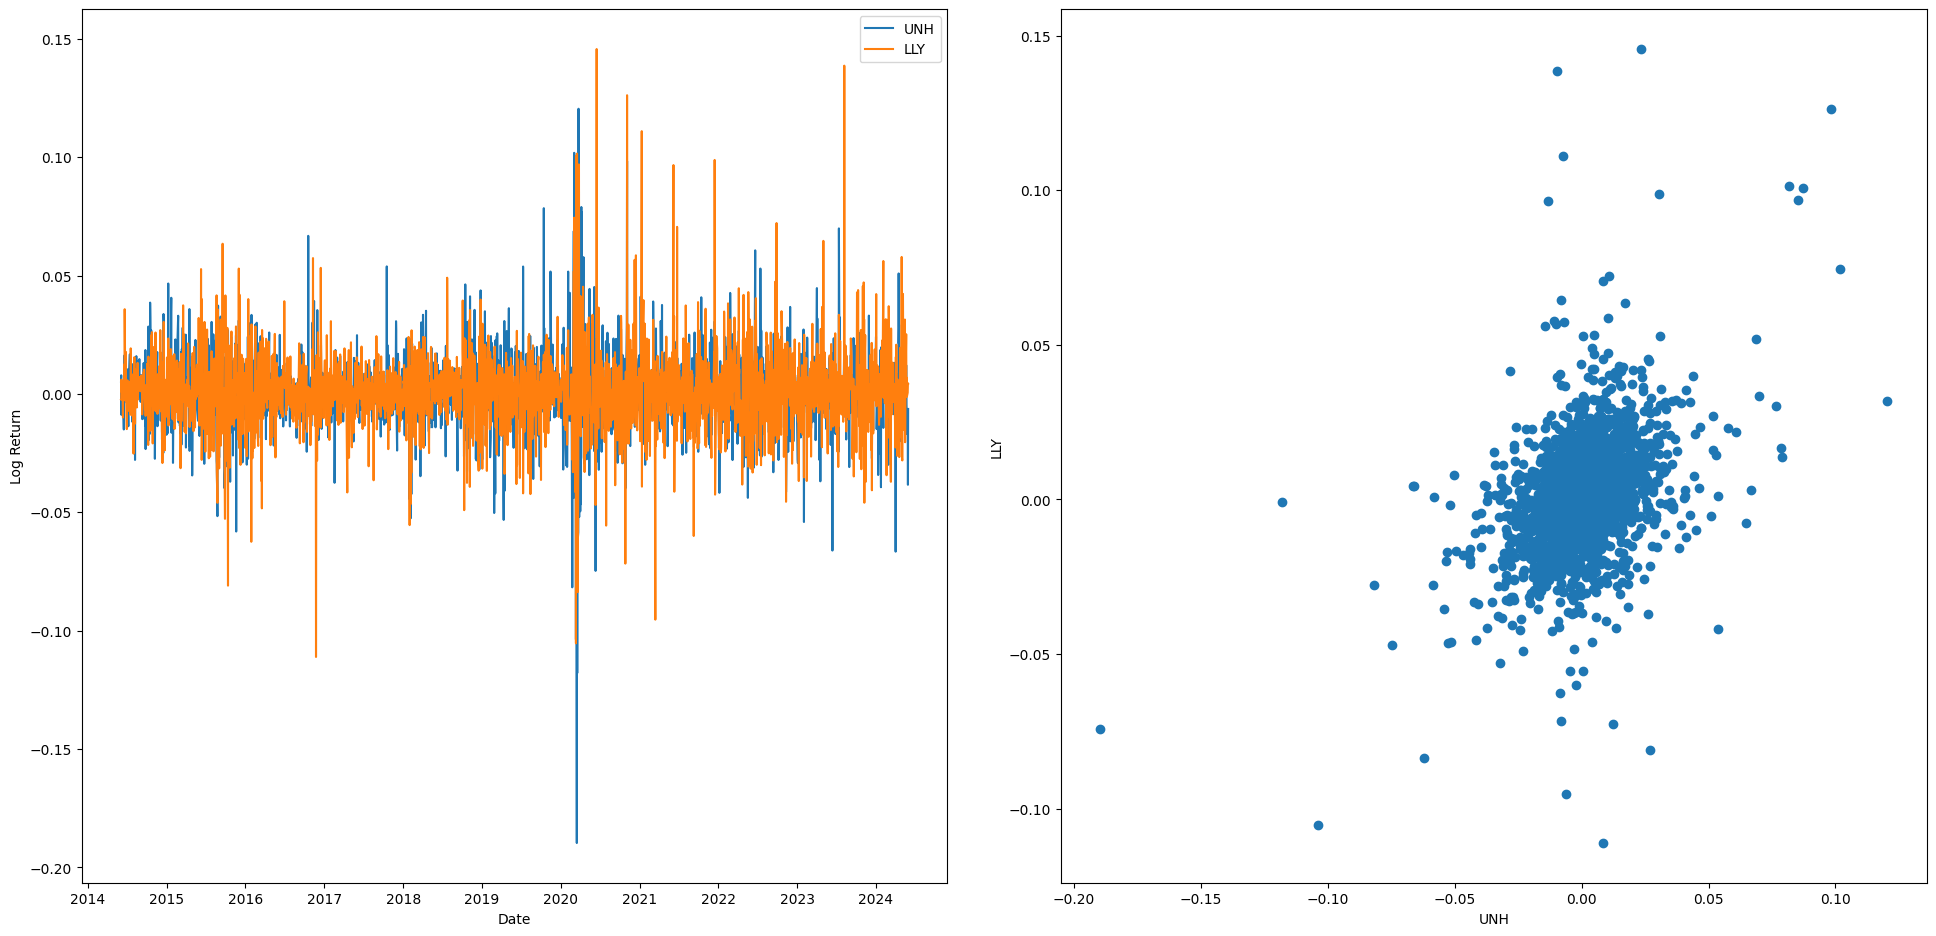

          NEE        SO
NEE  1.000000  0.715323
SO   0.715323  1.000000


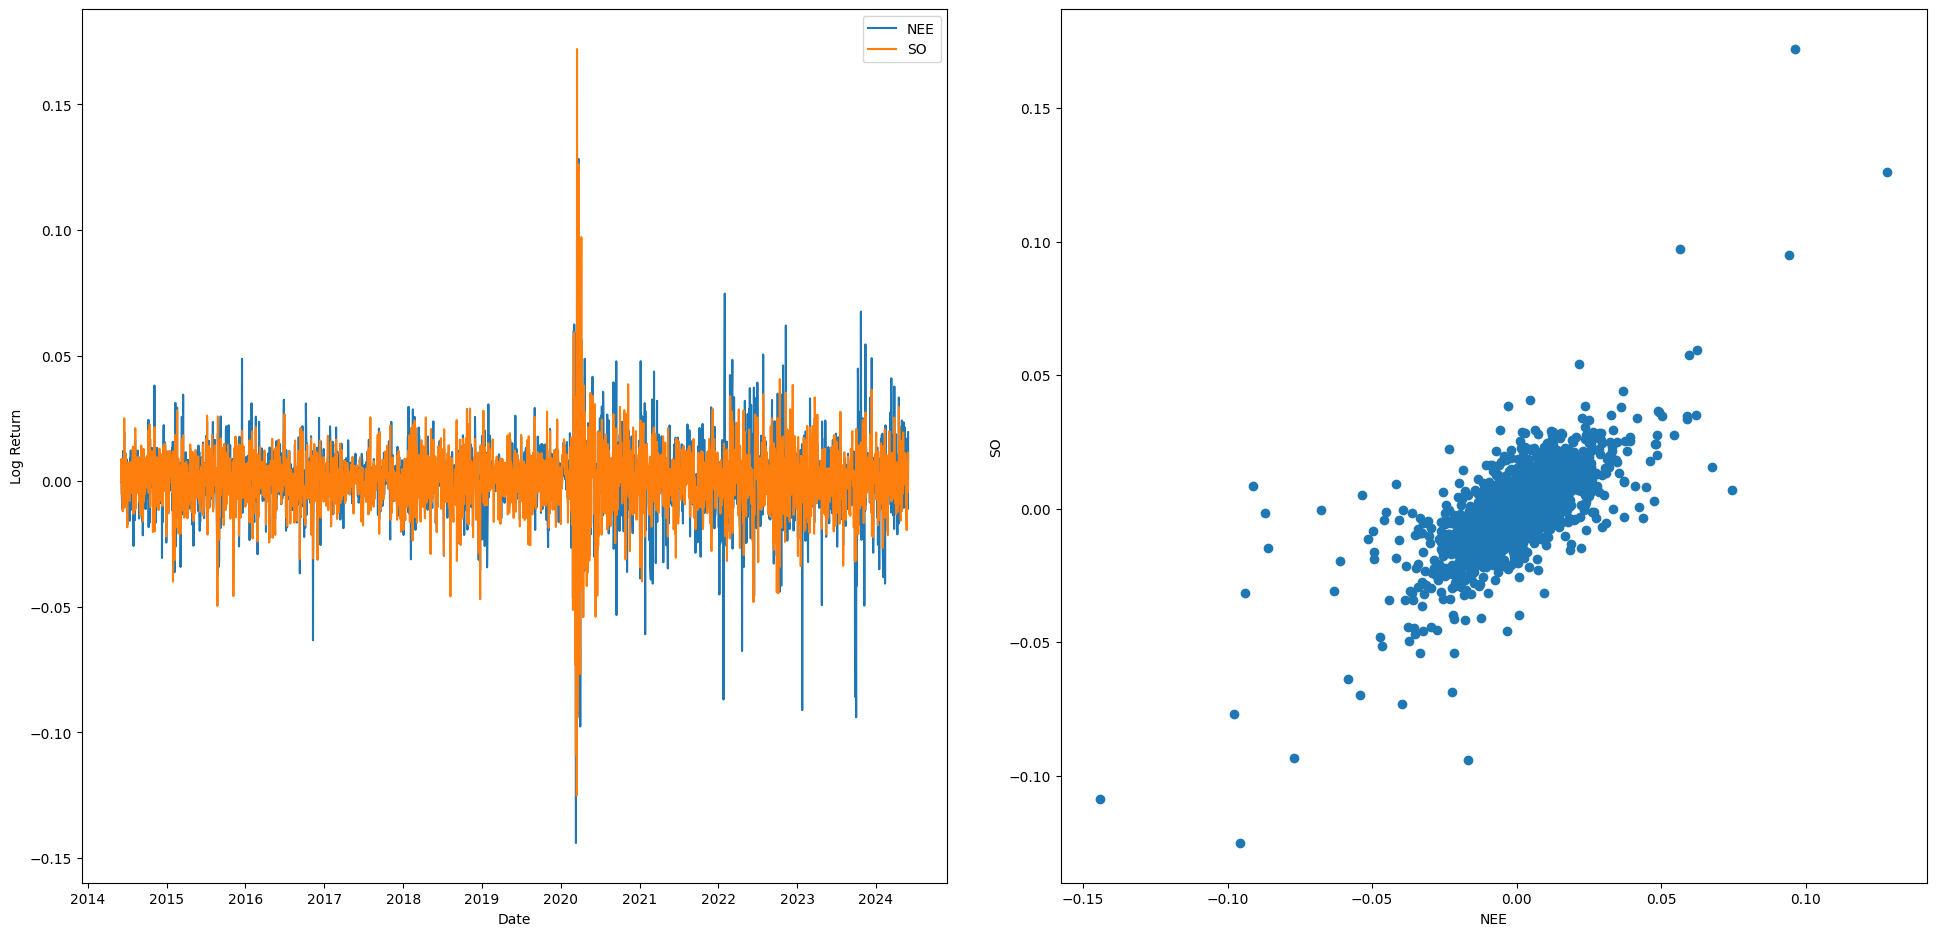

In [87]:
df = pd.DataFrame(columns=['NVDA', 'QCOM'])
sectors = {
    'Technology': ['NVDA', 'QCOM'],
    'Healthcare': ['UNH', 'LLY'],
    'Utilities': ['NEE', 'SO']
}

for sector, nstock in sectors.items():
    df = pd.DataFrame(columns=nstock)
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))
    for stock in nstock:
        df[stock] = globals()[stock]['Log Return']

    print(df.corr())
    axs[0].plot(df) 
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('Log Return')
    axs[0].legend(nstock)
    axs[1].scatter(df[nstock[0]], df[nstock[1]]) 
    axs[1].set_xlabel(nstock[0])
    axs[1].set_ylabel(nstock[1])
    plt.tight_layout(pad=3.0)
    plt.show()




Calcolo del rendimento cumulato

In [88]:
print(stocks)
for stock in stocks:
    stock['Cum'] = np.cumprod(stock['Gross Return'])



[                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-06-03    0.474500    0.475000    0.465250    0.471500    0.448839   
2014-06-04    0.470250    0.475500    0.470000    0.472000    0.449315   
2014-06-05    0.472750    0.475500    0.470000    0.474000    0.451218   
2014-06-06    0.476250    0.480000    0.474500    0.475750    0.452884   
2014-06-09    0.475250    0.480750    0.472000    0.476250    0.453360   
...                ...         ...         ...         ...         ...   
2024-05-23  102.028000  106.320000  101.519997  103.799004  103.790482   
2024-05-24  104.448997  106.474998  103.000000  106.469002  106.460258   
2024-05-28  110.244003  114.939003  109.883003  113.901001  113.891647   
2024-05-29  113.050003  115.491997  110.901001  114.824997  114.815567   
2024-05-30  114.650002  115.819000  109.663002  110.500000  110.490921   

               Volume  Net Return  G

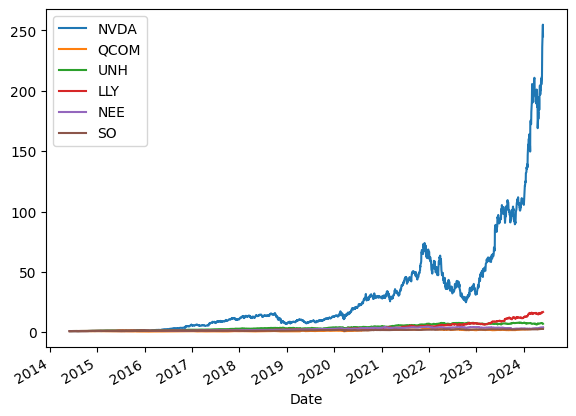

In [89]:
df = pd.DataFrame()

for i in range(6):
    df[stocks_tickets[i]] = stocks[i]['Cum']

df.plot()
plt.tight_layout(pad=3.0)
plt.show()

In [90]:
df

,NVDA,QCOM,UNH,LLY,NEE,SO
Date,,,,,,
2014-06-03,0.995776,0.999006,1.005160,0.997647,0.999794,1.000000
2014-06-04,0.996832,0.993041,1.013087,0.995461,1.001441,1.001374
2014-06-05,1.001056,0.989811,1.004153,1.001513,1.006071,1.010304
2014-06-06,1.004752,0.998757,1.005788,1.002353,1.002675,1.005038
2014-06-09,1.005808,0.993414,1.003649,1.004202,0.991768,0.999313
...,...,...,...,...,...,...
2024-05-23,230.265615,3.341733,7.580051,16.644243,3.982854,2.746923
2024-05-24,236.188681,3.484174,7.453040,16.623243,4.051068,2.767569
2024-05-28,252.675678,3.529225,7.387187,16.632096,4.099717,2.760094


Calcolo tasso composto annuo

In [91]:
delta = (end - start)/datetime.timedelta(days=1)

In [92]:
cagrs = pd.DataFrame()
cagrs.index = stocks_tickets

for i in range(len(stocks)):
    stock = stocks[i]
    cagr = (stock['Adj Close'][-1]/stock['Adj Close'][0])**(365/delta) - 1
    cagrs.loc[stocks_tickets[i], 'CAGR'] = cagr

cagrs

C:\Users\Riccardo Savio\AppData\Local\Temp\ipykernel_23256\3936899179.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cagr = (stock['Adj Close'][-1]/stock['Adj Close'][0])**(365/delta) - 1
C:\Users\Riccardo Savio\AppData\Local\Temp\ipykernel_23256\3936899179.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cagr = (stock['Adj Close'][-1]/stock['Adj Close'][0])**(365/delta) - 1


,CAGR
NVDA,0.733514
QCOM,0.130378
UNH,0.215101
LLY,0.325811
NEE,0.152396
SO,0.107535


Correlazione tra azioni dello stesso settore

In [93]:

it_df = pd.DataFrame()
it_df['NVDA'] = NVDA['Net Return']
it_df['QCOM'] = QCOM['Net Return']

print("Correlazione NVIDIA, QUALCOMM:", it_df.corr().iloc[0, 1])

hlt_df = pd.DataFrame()
hlt_df['UNH'] = UNH['Net Return']
hlt_df['LLY'] = LLY['Net Return']

print("Correlazione UnitedHealth Group, Eli Lilly and Company:", hlt_df.corr().iloc[0, 1])

ut_df = pd.DataFrame()
ut_df['NEE'] = NEE['Net Return']
ut_df['SO'] = SO['Net Return']

print("Correlazione NextEra Energy, Southern Co:", ut_df.corr().iloc[0, 1])


Correlazione NVIDIA, QUALCOMM: 0.5334767836444538
Correlazione UnitedHealth Group, Eli Lilly and Company: 0.4027771216015541
Correlazione NextEra Energy, Southern Co: 0.7166523774980348


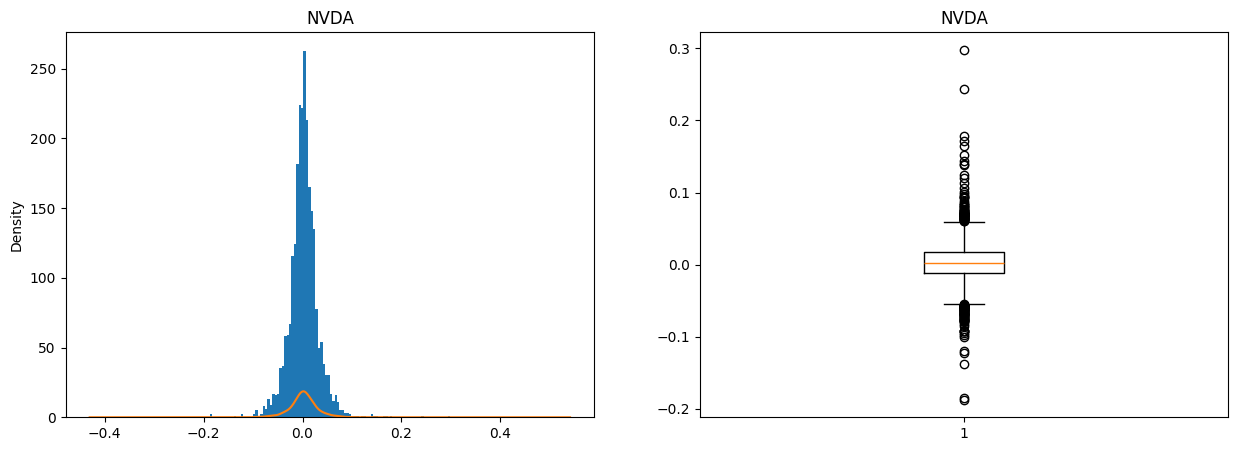

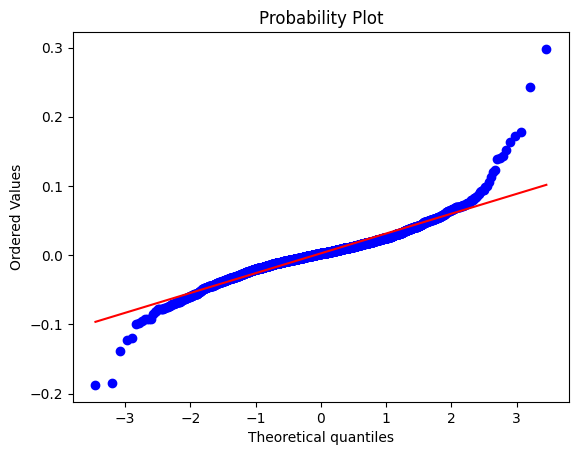

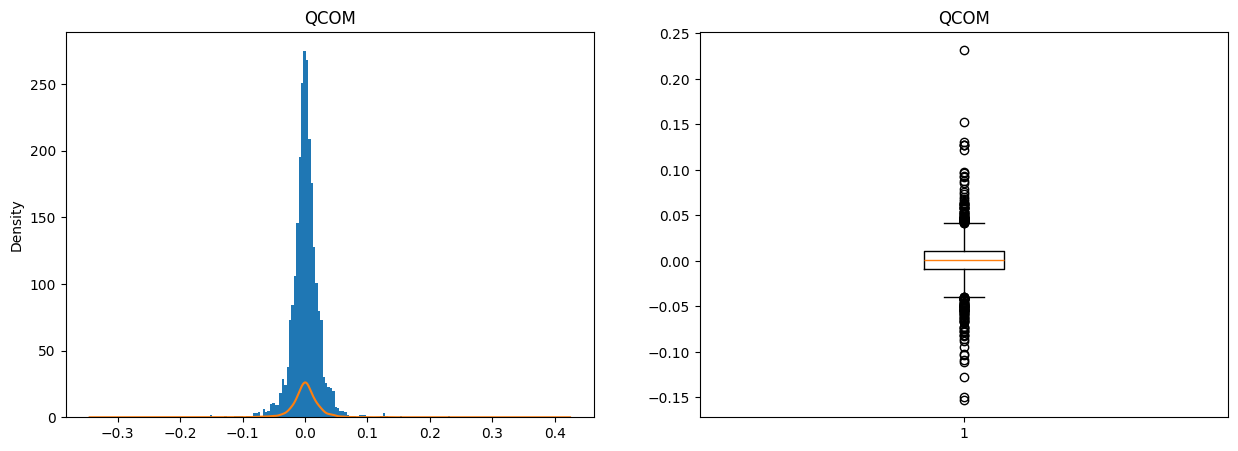

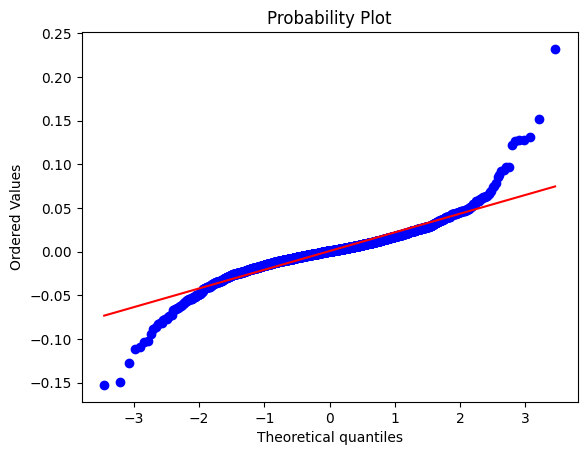

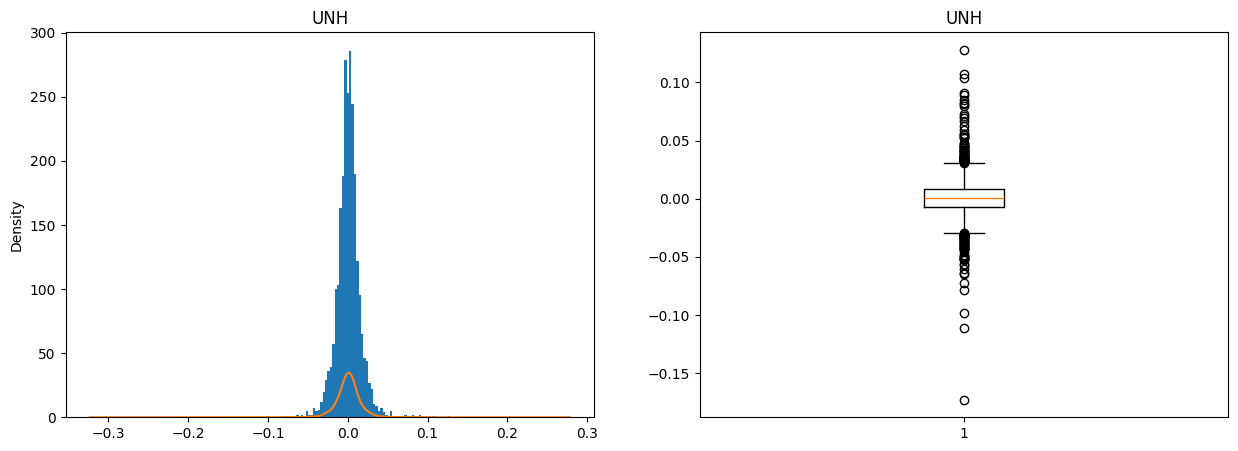

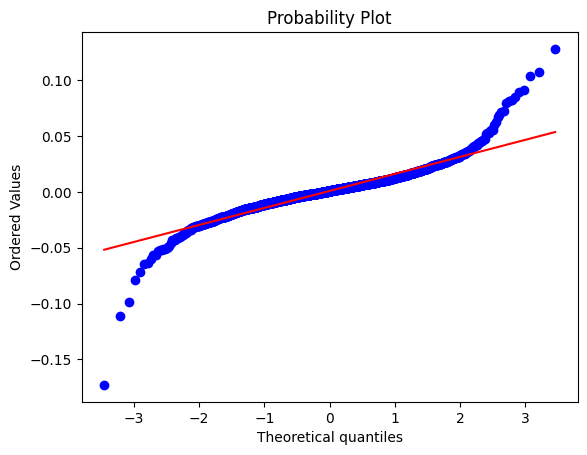

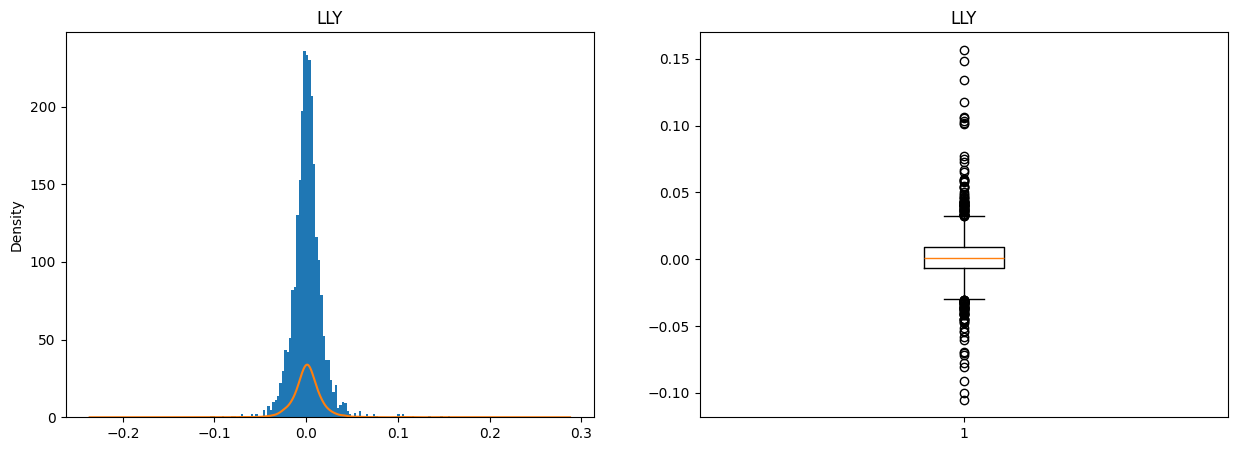

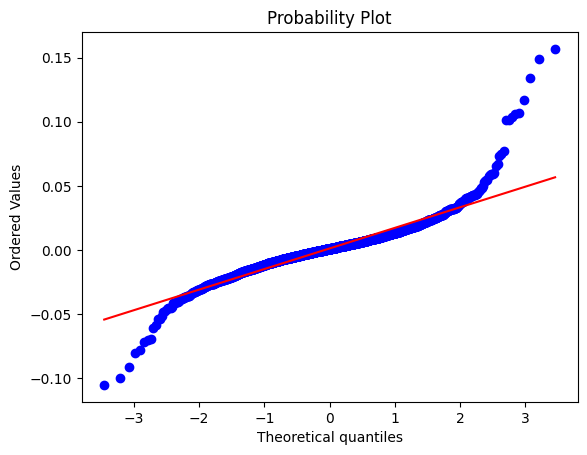

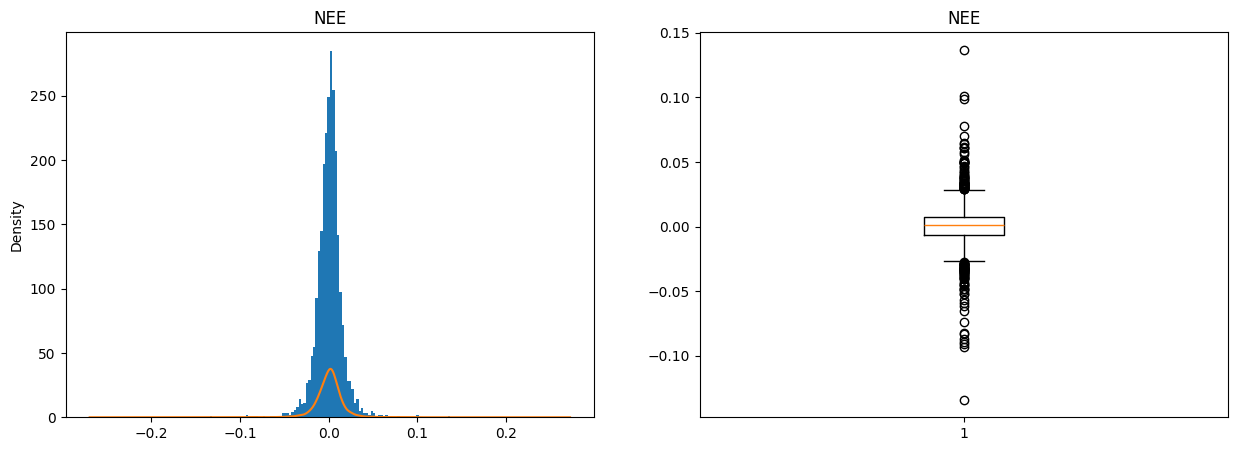

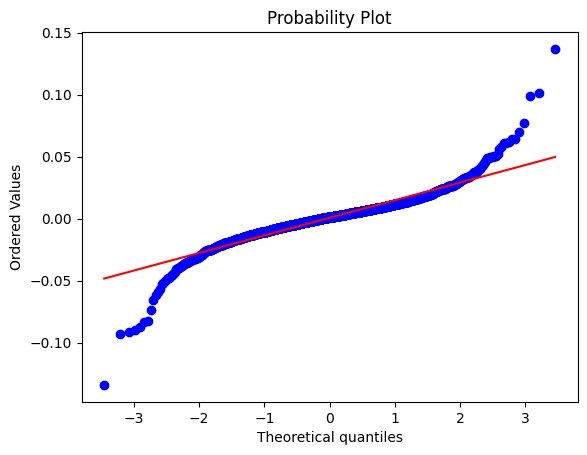

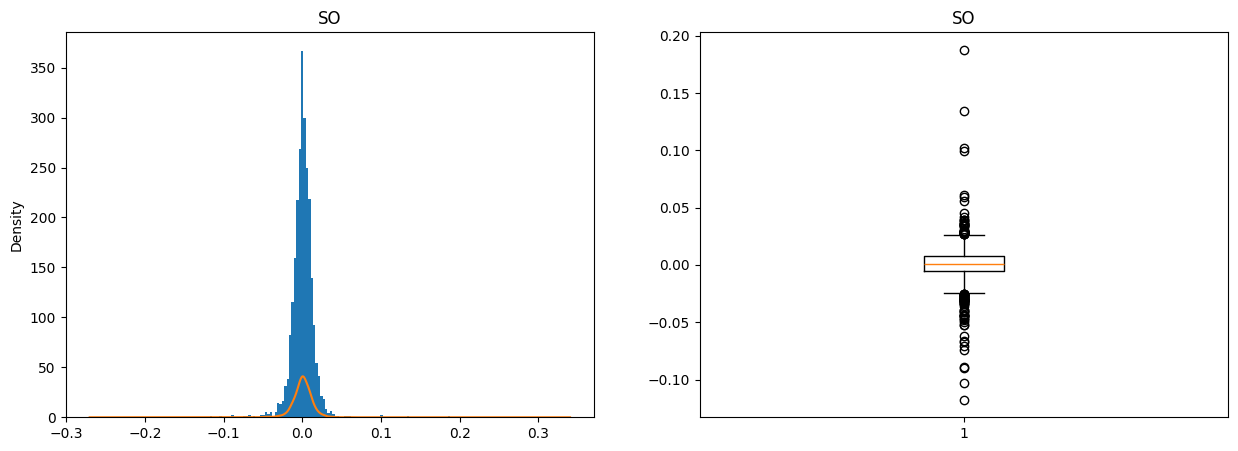

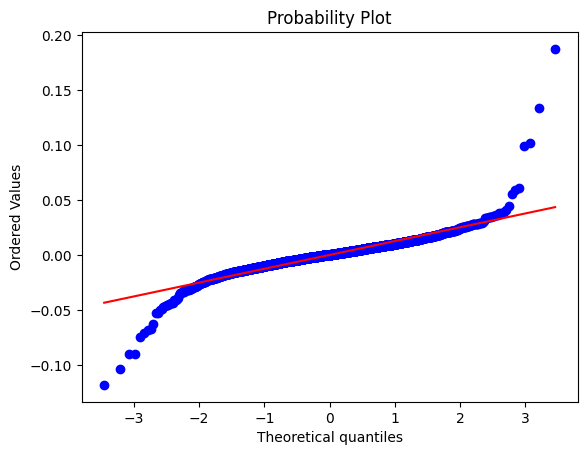

: 

In [99]:
for i in range(len(stocks)):
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].hist(stocks[i]['Net Return'], bins=100)
    stocks[i]['Net Return'].plot(kind='kde', ax=axs[0])
    axs[0].set_title(stocks_tickets[i])
    axs[1].boxplot(stocks[i]['Net Return'])
    axs[1].set_title(stocks_tickets[i])
    #qq plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    stats.probplot(stocks[i]['Net Return'], dist="norm", plot=plt)
    plt.show()
    